# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 9.9 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [6]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
accidents.head(2)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,at_intersection,was_non_functioning_device,is_day,is_evening,is_morning,is_night,is_fall,is_spring,is_summer,is_winter
0,JC343143,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,NaN,...,0,0,1,0,0,0,0,0,1,0
5,JC194776,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,4.0,...,0,0,0,0,0,1,0,1,0,0


In [7]:
for feature in sorted(accidents.columns):
    print(feature)

ALIGNMENT
BEAT_OF_OCCURRENCE
CRASH_DATE
CRASH_DAY_OF_WEEK
CRASH_HOUR
CRASH_TYPE
DEVICE_CONDITION
FIRST_CRASH_TYPE
HIT_AND_RUN_I
INJURIES_UNKNOWN
INTERSECTION_RELATED_I
LANE_CNT
LATITUDE
LIGHTING_CONDITION
LOCATION
LONGITUDE
NOT_RIGHT_OF_WAY_I
POSTED_SPEED_LIMIT
PRIM_CONTRIBUTORY_CAUSE
RD_NO
ROADWAY_SURFACE_COND
ROAD_DEFECT
SEC_CONTRIBUTORY_CAUSE
STREET_DIRECTION
STREET_NAME
STREET_NO
TRAFFICWAY_TYPE
TRAFFIC_CONTROL_DEVICE
WEATHER_CONDITION
WORKERS_PRESENT_I
WORK_ZONE_I
WORK_ZONE_TYPE
at_intersection
at_stop_sign_or_traffic_light
crash_date
crash_month
crash_year
has_snow_ice
involved_pedest_cycle
is_clear_weather
is_day
is_evening
is_fall
is_fatal_or_incap
is_morning
is_night
is_rain
is_sleet_snow
is_spring
is_summer
is_weekend
is_winter
season
time_of_day
was_dark_no_lighting
was_head_on
was_non_functioning_device
was_parked


## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [8]:
X = accidents[['is_weekend',
               'involved_pedest_cycle',
               'at_stop_sign_or_traffic_light',
               'is_day',
               'is_evening',
               'is_morning',
               'is_night',
               'is_rain',
               'is_sleet_snow',
               'is_spring',
               'is_summer',
               'is_winter',
               'is_fall',
               'was_non_functioning_device',
               'was_head_on',
               'was_parked',
               'at_intersection',
               'was_dark_no_lighting',
               'is_clear_weather', 
               'POSTED_SPEED_LIMIT']]

y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [9]:
X_train

,is_weekend,involved_pedest_cycle,at_stop_sign_or_traffic_light,is_day,is_evening,is_morning,is_night,is_rain,is_sleet_snow,is_spring,is_summer,is_winter,is_fall,was_non_functioning_device,was_head_on,was_parked,at_intersection,was_dark_no_lighting,is_clear_weather,POSTED_SPEED_LIMIT
41387,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,20
123556,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,30
93853,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,30
376291,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,10
142062,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,30
81076,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,30
127321,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,30
321009,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,30


In [10]:
# OVERSAMPLING

oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)
X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [11]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([0.00373151, 0.08077159, 0.01426548, 0.01332671, 0.00194228,
       0.00208678, 0.00537236, 0.00054978, 0.        , 0.00141863,
       0.00157961, 0.00388953, 0.00566708, 0.        , 0.00130673,
       0.02638546, 0.00316058, 0.00040027, 0.02859223, 0.02844773])

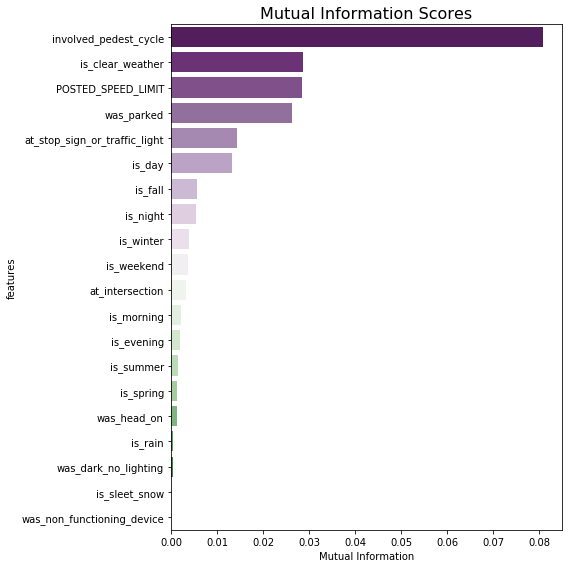

In [12]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)


fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(data=mi_df,x='mutual_info_score', y='features', palette='PRGn', ax=ax)
ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();

## Chi-Squared

Can only use categorical features.

In [13]:
X = accidents[['is_weekend',
               'involved_pedest_cycle',
               'at_stop_sign_or_traffic_light',
               'is_day',
               'is_evening',
               'is_morning',
               'is_night',
               'is_rain',
               'is_sleet_snow',
               'is_spring',
               'is_summer',
               'is_winter',
               'is_fall',
               'was_non_functioning_device',
               'was_head_on',
               'was_parked',
               'at_intersection',
               'was_dark_no_lighting',
               'is_clear_weather']]


y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
# OVERSAMPLING
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

In [15]:
# First array is comprised of the F-scores.
# Second array is comprised of the p-values.
f_score = chi2(X_over, y_over)
f_score

(array([1.21330784e+02, 5.00555771e+04, 2.74283184e+03, 8.63112354e+02,
        7.81876347e+01, 3.36736611e+00, 1.75682546e+03, 6.55721295e+02,
        1.74159138e+02, 1.66316335e+01, 6.78687191e+01, 9.69226328e+01,
        3.33006178e+01,            nan, 1.26037780e+03, 1.14736460e+04,
        1.94515760e+03, 8.92976861e+01, 1.07347446e+01]),
 array([3.23445507e-028, 0.00000000e+000, 0.00000000e+000, 1.02550662e-189,
        9.37032523e-019, 6.64999926e-002, 0.00000000e+000, 1.27306497e-144,
        9.13759159e-040, 4.53876728e-005, 1.74751648e-016, 7.20898979e-023,
        7.89575513e-009,             nan, 4.61088695e-276, 0.00000000e+000,
        0.00000000e+000, 3.39656184e-021, 1.05142514e-003]))

In [16]:
chi2_p_values = pd.DataFrame()
chi2_p_values['features'] = X_train.columns
chi2_p_values['p_value'] = f_score[1]
chi2_p_values['p_value'] = chi2_p_values['p_value'].apply(lambda x: np.round(x, decimals=4))
chi2_p_values.sort_values('p_value', ascending=True, axis=0, inplace=True)


chi2_p_values

,features,p_value
0,is_weekend,0.0000
16,at_intersection,0.0000
15,was_parked,0.0000
14,was_head_on,0.0000
12,is_fall,0.0000
11,is_winter,0.0000
10,is_summer,0.0000
9,is_spring,0.0000
8,is_sleet_snow,0.0000
7,is_rain,0.0000
